<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 5.1.1
# *Evaluating Classification Models*

In this lab you will be practicing evaluating classification models (Logistic Regression in particular) on a "Breast Cancer" data.

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics 

%matplotlib inline

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix



### 1. Load Data

From UCI's Machine Learning Repository: https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server: ftp ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/


Attribute Information:

1) ID number 2) Diagnosis (M = malignant, B = benign) 3-32)

Ten real-valued features are computed for each cell nucleus:

    a) radius (mean of distances from center to points on the perimeter)
    b) texture (standard deviation of gray-scale values)
    c) perimeter
    d) area
    e) smoothness (local variation in radius lengths)
    f) compactness (perimeter^2 / area - 1.0)
    g) concavity (severity of concave portions of the contour)
    h) concave points (number of concave portions of the contour)
    i) symmetry
    j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

In [47]:
breast_cancer_csv = 'breast-cancer-wisconsin-data.csv'

In [48]:
breast_cancer = pd.read_csv('breast-cancer-wisconsin-data.csv')

In [49]:
breast_cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [50]:
breast_cancer = pd.read_csv("breast-cancer-wisconsin-data.csv", index_col='diagnosis')

In [51]:
print(breast_cancer.head())

                 id  radius_mean  texture_mean  perimeter_mean  area_mean  \
diagnosis                                                                   
M            842302        17.99         10.38          122.80     1001.0   
M            842517        20.57         17.77          132.90     1326.0   
M          84300903        19.69         21.25          130.00     1203.0   
M          84348301        11.42         20.38           77.58      386.1   
M          84358402        20.29         14.34          135.10     1297.0   

           smoothness_mean  compactness_mean  concavity_mean  \
diagnosis                                                      
M                  0.11840           0.27760          0.3001   
M                  0.08474           0.07864          0.0869   
M                  0.10960           0.15990          0.1974   
M                  0.14250           0.28390          0.2414   
M                  0.10030           0.13280          0.1980   

           

### 2. EDA

Explore dataset. Check for nulls. Make the target column binary.

In [52]:
null_counts = breast_cancer.isnull().sum()
print(null_counts)

id                           0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed: 32                569
dtype: i

In [53]:
breast_cancer.tail()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
diagnosis,,,,,,,,,,,,,,,,,,,,,
M,926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
M,926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
M,926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
M,927241,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
B,92751,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [54]:
duplicateValues = breast_cancer.duplicated()
print(duplicateValues.sum())
breast_cancer[duplicateValues]

0


,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
diagnosis,,,,,,,,,,,,,,,,,,,,,


In [55]:
breast_cancer.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [56]:
breast_cancer = breast_cancer.drop('Unnamed: 32',axis =1)

### 3. Logistic Regression Model

#### 3.1 Use Logistic Regression

Use Logistic Regression and examine accuracy score, confusion matrix, classification report for that model.

C:\Users\Renee Garrett\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.0


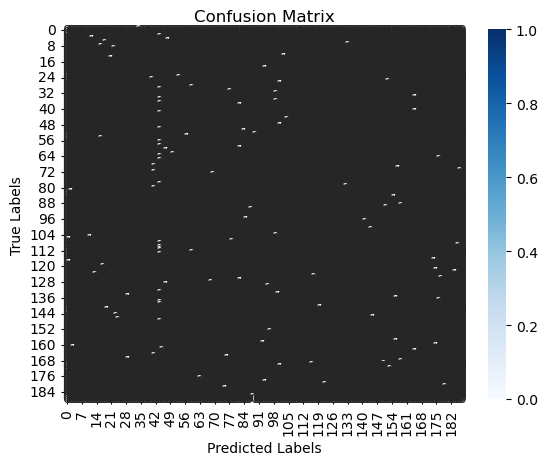

Classification Report:
              precision    recall  f1-score   support

        8670       0.00      0.00      0.00       1.0
       86208       0.00      0.00      0.00       0.0
       86409       0.00      0.00      0.00       0.0
       86517       0.00      0.00      0.00       0.0
       87106       0.00      0.00      0.00       1.0
       87880       0.00      0.00      0.00       1.0
       87930       0.00      0.00      0.00       1.0
       90250       0.00      0.00      0.00       1.0
       91858       0.00      0.00      0.00       1.0
      844359       0.00      0.00      0.00       1.0
      845636       0.00      0.00      0.00       1.0
      846226       0.00      0.00      0.00       0.0
      849014       0.00      0.00      0.00       0.0
      852631       0.00      0.00      0.00       0.0
      853201       0.00      0.00      0.00       1.0
      853401       0.00      0.00      0.00       1.0
      854039       0.00      0.00      0.00       0.0
    

C:\Users\Renee Garrett\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Renee Garrett\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Renee Garrett\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Renee Garrett\anaconda3\Lib\si

In [57]:
# Assuming 'diagnosis' is the target column
target_col = 'id'
feature_cols = [c for c in breast_cancer.columns if c not in [target_col, 'Unnamed: 32']]

X = breast_cancer[feature_cols]
y = breast_cancer[target_col]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg_model.predict(X_test)

# Evaluate the model

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Classification Report
print('Classification Report:')
print(classification_report(y_test, y_pred))

#### 3.2 Calculate the predicted labels and predicted probabilities on the test set.

In [58]:
# predict test class:

# predicted test probability:

target_col = 'id'
feature_cols = [c for c in breast_cancer.columns if c not in [target_col, 'Unnamed: 32']]

X = breast_cancer[feature_cols]
y = breast_cancer[target_col]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

# Calculate predicted labels and predicted probabilities on the test set
y_pred_labels = logreg_model.predict(X_test)
y_pred_probabilities = logreg_model.predict_proba(X_test)

# Display the results
print("Predicted Labels:")
print(y_pred_labels)

print("\nPredicted Probabilities:")
print(y_pred_probabilities)

Predicted Labels:
[   877501    885429    864729     86409    875099    854253    914769
    915940    907914   9110944   9013579    862028    915452    877159
   8510653    877159   8911670    875099    894329     86208   9011495
    872113 911157302    872113    875099 881094802   9013594    875099
    875099    871201    875099    907914   8710441    904647    875099
    872113    857438    858970    854039    915460    875099    858986
    875099  90317302    855133    905502    915186    894329  91376701
   8911834    854039    855625   9013579    846226    875099    911202
    875099    901088    914366    875099  90401601     86517  89263202
    914333    875099    925622  84862001    926125    875099    884626
    917062  84862001    901303   9010872    905978   9010877    915460
    911654    915186    872113    862028  90317302    905190    908445
    926954    892189    875263  89742801    854941    907914    914580
    914366    909220    875099    875099    915186     8620

C:\Users\Renee Garrett\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### 3.3 Create the confusion matrix for your classifier's performance on the test set.

Convert confusion_matrix to a dataframe.

    columns=['predicted_healthy', 'predicted_cancer']
    index=['is_healthy', 'is_cancer']

In [59]:
# Assuming 'diagnosis' is the target column
target_col = 'id'
feature_cols = [c for c in breast_cancer.columns if c not in [target_col, 'Unnamed: 32']]

X = breast_cancer[feature_cols]
y = breast_cancer[target_col]

# Convert the target variable to binary (assuming 'M' is malignant and 'B' is benign)
y_binary = y.map({'M': 1, 'B': 0})

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=1)

# Initialize and train the Logistic Regression model
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_labels = logreg_model.predict(X_test)

# Create confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_labels)

# Convert confusion matrix to a DataFrame
conf_df = pd.DataFrame(conf_matrix, columns=['predicted_healthy', 'predicted_cancer'], index=['is_healthy', 'is_cancer'])

# Display the confusion matrix DataFrame
print("Confusion Matrix:")
print(conf_df)

ValueError: Input y contains NaN.

In [ ]:
# ANSWER

# Assuming 'diagnosis' is the target column
target_col = 'id'
feature_cols = [c for c in breast_cancer.columns if c not in [target_col, 'Unnamed: 32']]

X = breast_cancer[feature_cols]
y = breast_cancer[target_col]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_labels = logreg_model.predict(X_test)

# Create confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_labels)

# Convert confusion matrix to a DataFrame
conf_df = pd.DataFrame(conf_matrix, columns=['predicted_healthy', 'predicted_cancer'], index=['is_healthy', 'is_cancer'])

# Display the confusion matrix DataFrame
print("Confusion Matrix:")
print(conf_df)

#### 3.4 Calculate Accuracy

**Classification Accuracy:** Overall, how often is the classifier correct?

    (TP + TN) / float(TP + TN + FP + FN)

In [ ]:
# ANSWER
# use float to perform true division, not integer division

# Assuming 'diagnosis' is the target column
target_col = 'id'
feature_cols = [c for c in breast_cancer.columns if c not in [target_col, 'Unnamed: 32']]

X = breast_cancer[feature_cols]
y = breast_cancer[target_col]

# Convert the target variable to binary (assuming 'M' is malignant and 'B' is benign)
y_binary = y.map({'M': 1, 'B': 0})

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=1)

# Initialize and train the Logistic Regression model
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_labels = logreg_model.predict(X_test)

# Create confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_labels)

# Calculate accuracy using float division
accuracy = (conf_matrix[0, 0] + conf_matrix[1, 1]) / float(conf_matrix.sum())

# Display the accuracy
print("Classification Accuracy:", accuracy)

#### 3.5 Calculate Classification Error

**Classification Error:** Overall, how often is the classifier incorrect?

Also known as "Misclassification Rate"

    (FP + FN) / float(TP + TN + FP + FN)

In [60]:
# ANSWER

# Assuming 'diagnosis' is the target column
target_col = 'id'
feature_cols = [c for c in breast_cancer.columns if c not in [target_col, 'Unnamed: 32']]

X = breast_cancer[feature_cols]
y = breast_cancer[target_col]

# Convert the target variable to binary (assuming 'M' is malignant and 'B' is benign)
y_binary = y.map({'M': 1, 'B': 0})

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=1)

# Initialize and train the Logistic Regression model
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_labels = logreg_model.predict(X_test)

# Create confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_labels)

# Calculate classification error using float division
classification_error = (conf_matrix[0, 1] + conf_matrix[1, 0]) / float(conf_matrix.sum())

# Display the classification error
print("Classification Error:", classification_error)

ValueError: Input y contains NaN.

#### 3.6 Calculate Sensitivity

**Sensitivity:** When the actual value is positive, how often is the prediction correct?

Something we want to maximize
How "sensitive" is the classifier to detecting positive instances?
- Also known as "True Positive Rate" or "Recall"
- TP / all positive
    - all positive = TP + FN

    sensitivity = TP / float(FN + TP)

In [61]:
# ANSWER

target_col = 'id'
feature_cols = [c for c in breast_cancer.columns if c not in [target_col, 'Unnamed: 32']]

X = breast_cancer[feature_cols]
y = breast_cancer[target_col]

# Convert the target variable to binary (assuming 'M' is malignant and 'B' is benign)
y_binary = y.map({'M': 1, 'B': 0})

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=1)

# Initialize and train the Logistic Regression model
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_labels = logreg_model.predict(X_test)

# Create confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_labels)

# Calculate sensitivity using float division
sensitivity = conf_matrix[1, 1] / float(conf_matrix[1, 1] + conf_matrix[1, 0])

# Display the sensitivity
print("Sensitivity (True Positive Rate or Recall):", sensitivity)

ValueError: Input y contains NaN.

#### 3.7 Calculate Specificity

**Specificity:** When the actual value is negative, how often is the prediction correct?

- Something we want to maximize. How "specific" (or "selective") is the classifier in predicting positive instances?
- TN / all negative
    - all negative = TN + FP

    specificity = TN / (TN + FP)

In [ ]:
# ANSWER

#### 3.8 Calculate False Positive Rate

**False Positive Rate:** When the actual value is negative, how often is the prediction incorrect?

    false_positive_rate = FP / float(TN + FP)

In [ ]:
# ANSWER

#### 3.9 Calculate Precision

**Precision:** When a positive value is predicted, how often is the prediction correct?

How "precise" is the classifier when predicting positive instances?

    precision = TP / float(TP + FP)

In [ ]:
# ANSWER

#### 3.10 Create a predicted test probability dataframe with column names 'class_0_pp','class_1_pp'

In [ ]:
# ANSWER
# Get the predicted probability vector and explicitly name the columns:)

#### 3.11 The Receiver operating characteristic (ROC) curve

Plot the ROC curve for Class 1

In [ ]:
from sklearn.metrics import roc_curve, auc

No handles with labels found to put in legend.


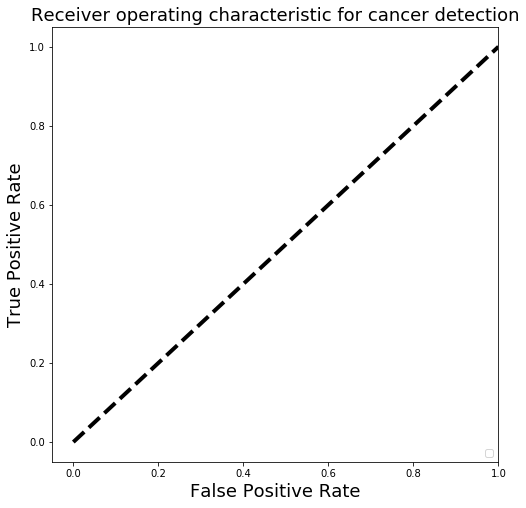

In [ ]:
# For class 1, find the area under the curve
# Find fpr, tpr

# Find auc

# Plot of a ROC curve for class 1 (has_cancer)
plt.figure(figsize=[8,8])

# Plot fpr, tpr
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver operating characteristic for cancer detection', fontsize=18)
plt.legend(loc="lower right")
plt.show()

**References**

[Breast Cancer Wisconsin (Diagnostic) Data Set](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/downloads/breast-cancer-wisconsin-data.zip/2)

[Validation curves: plotting scores to evaluate models](https://scikit-learn.org/stable/modules/learning_curve.html#learning-curves)



---



---



> > > > > > > > > © 2023 Institute of Data


---



---



